In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
plt.ion()

# Prune data
data = pd.read_csv("NYPD_arrests.csv", parse_dates=["ARREST_DATE"])
data = data[["ARREST_DATE", "OFNS_DESC"]]
data = data.dropna(subset=['OFNS_DESC'])
data["YEAR"] = pd.DatetimeIndex(data['ARREST_DATE']).year
data["MONTH"] = pd.DatetimeIndex(data['ARREST_DATE']).month


# Filter data by offense
def get_offence_data(data, offence):
    return data.loc[data['OFNS_DESC'] == offence]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
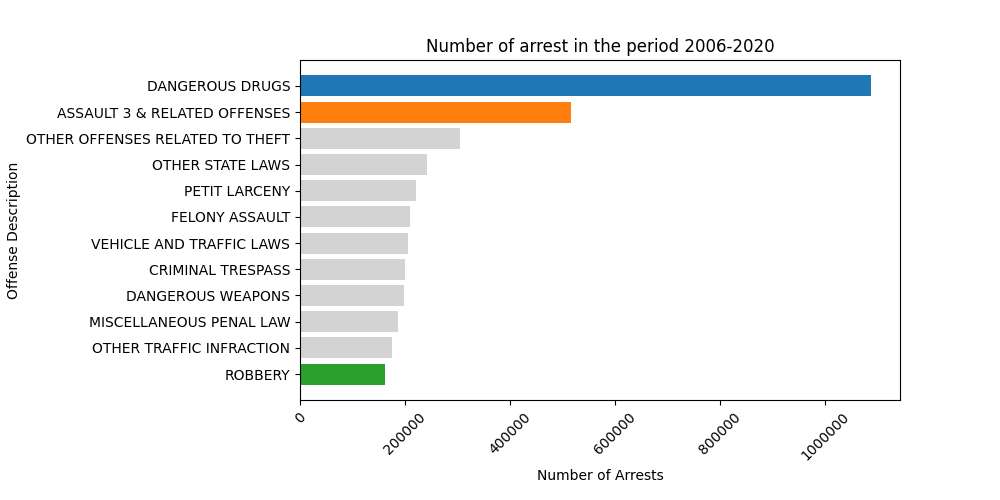

In [2]:
# Dictionary with all offenses and the amount of arrests
offenses = dict(reversed(sorted(data.groupby("OFNS_DESC").size().to_dict().items(), key=lambda item: item[1])))

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.xticks(rotation=45)
ax.invert_yaxis()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set(xlabel='Number of Arrests', ylabel='Offense Description', title='Number of arrest in the period 2006-2020')
plt.gcf().subplots_adjust(left=0.3, bottom=0.2)

current = 0
for key, value in offenses.items():
    if current == 12:
        break
    if key not in ["DANGEROUS DRUGS", "ASSAULT 3 & RELATED OFFENSES", "ROBBERY"]:
        ax.barh(key, value, color="lightgrey")
    else:
        ax.barh(key, value)
    current += 1

plt.show()